# Hand-written digit classification using ANN (neural network)

In [ ]:
import tensorflow as tf
from tensorflow import keras 

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import numpy as np

In [ ]:
data = keras.datasets.mnist

In [ ]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train, y_train),(x_test, y_test) = data.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

60000 are data points and 28*28 pixel matrix

In [ ]:
x_train[0] #matrix of 0th image (2D)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[0][5] #5th row (if occupied, it will have numbers)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
x_train[0][0] #not occupied with a number

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

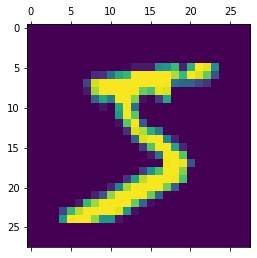

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

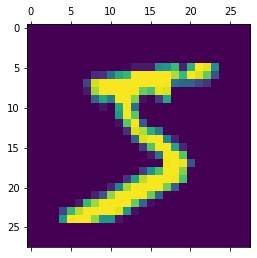

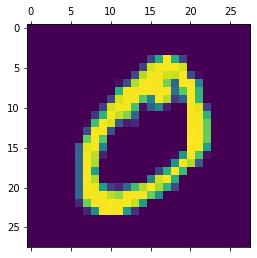

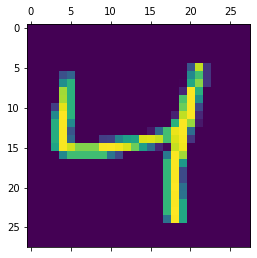

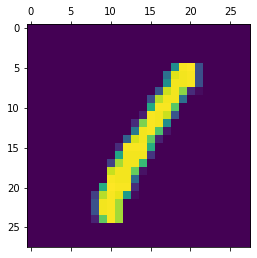

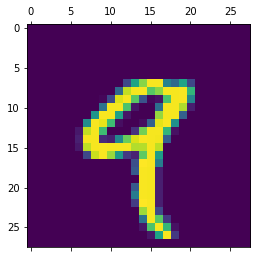

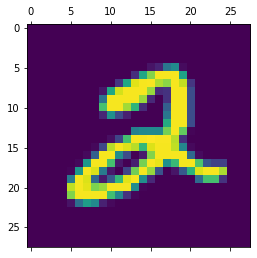

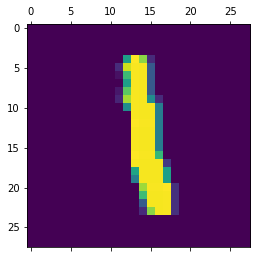

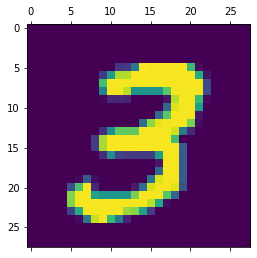

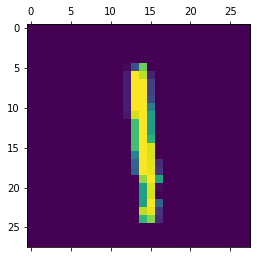

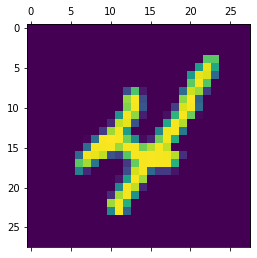

In [ ]:
for i in range(10):
  plt.matshow(x_train[i])


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:10]  #images 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Feature Scaling

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
#flatten the matrix

#1) numpy (np.flatten)
#2) np.ravel
#3) np.reshape()
#4) keras

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)

In [ ]:
x_test_flattened = x_test.reshape(len(x_test), 28*28)

in y_train and y_test, the data is already in 1D

but in x_train and x_test we have images

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
x_train_flattened[0]  #1D matrix

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Implementation of very simple neural network 

#Sequential model

In [ ]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train_flattened, y_train, epochs = 10)

#Dense - network will become more dense and more combinations will be made
#10 - number of neurons (each feature will get 10 neurons)
#input_shape - 784 flattened values
#metrics - for accuracy
#optimizer - how many times you have to go back and improve (optimizer is reducing the loss -> feedback is checked -> increasing the efficiency)
#loss - less the loss, more good the model is (number of times it has not worked well) 
#epochs - number of times the model is looking at the data (10 - 10 times the model is running -> kind of training the model)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4683 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9277
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.9249


[0.26694434881210327, 0.9248999953269958]

In [ ]:
y_pred = model.predict(x_test_flattened)

In [ ]:
y_pred[0] #probability of the output

array([4.5025647e-03, 2.0178639e-08, 1.6408771e-02, 9.7830057e-01,
       1.5995800e-03, 1.8214637e-01, 5.2602818e-08, 9.9987710e-01,
       8.1276238e-02, 7.4538767e-01], dtype=float32)

In [ ]:
#np.argmax -> finds the maximum element from array and returns the index of it

np.argmax(y_pred[0])  #39.9984276e-01 -> max

7

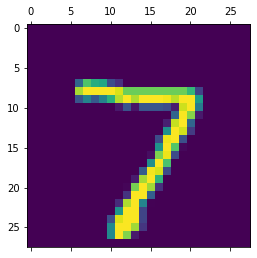

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_test[0]

7

In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred] #extracting the labels/numbers

In [ ]:
y_pred_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 3,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [ ]:
cm =  tf.math.confusion_matrix(y_test, y_pred_label)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  910,   25,    8,    4,   13,   11,   41,    5],
       [   2,    0,   12,  938,    1,   20,    3,    9,   16,    9],
       [   1,    1,    3,    2,  906,    0,   12,    4,    9,   44],
       [  10,    2,    1,   38,    9,  774,   16,    7,   28,    7],
       [  14,    3,    4,    3,    7,   12,  913,    1,    1,    0],
       [   1,    6,   20,    9,    8,    1,    0,  944,    2,   37],
       [   9,    8,    6,   24,    8,   30,   12,   11,  854,   12],
       [  11,    7,    1,   12,   18,    5,    0,   15,    3,  937]],
      dtype=int32)>

actual value 0 and model predicted 0 -> 966 number of times

Text(69.0, 0.5, 'actual')

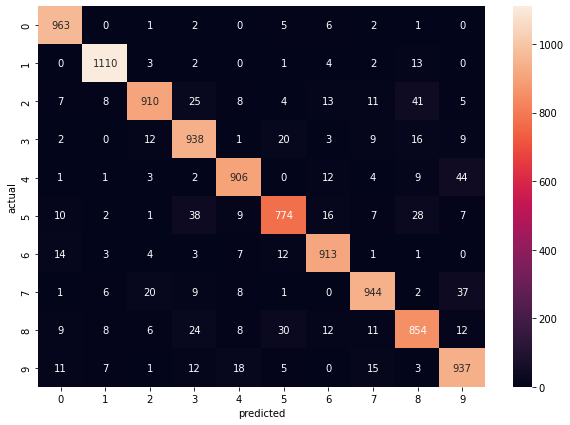

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
#adding one more hidden layer

model= keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=20)


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.9208
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1270 - accuracy: 0.9631
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9738
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9794
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9837
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0416 - accuracy: 0.9871
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9932
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9768


[0.10977981239557266, 0.9768000245094299]

In [ ]:
y_pred = model.predict(x_test_flattened)

In [ ]:
y_pred[0]

In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [ ]:
y_pred_label

array([[4.5025647e-03, 2.0178639e-08, 1.6408771e-02, ..., 9.9987710e-01,
        8.1276238e-02, 7.4538767e-01],
       [3.0204535e-01, 4.4705570e-03, 9.9946451e-01, ..., 2.1075323e-15,
        1.1004549e-01, 4.3874153e-12],
       [1.9663572e-04, 9.9360889e-01, 6.7089128e-01, ..., 4.2075157e-02,
        3.5841367e-01, 3.6636651e-02],
       ...,
       [1.2900248e-06, 7.0774746e-07, 5.4126978e-04, ..., 2.3831937e-01,
        5.7301086e-01, 8.4279615e-01],
       [1.6116279e-05, 2.7790613e-05, 1.7272789e-05, ..., 1.5279686e-05,
        6.3214320e-01, 2.0935486e-05],
       [1.4280081e-03, 8.9680988e-12, 8.7139457e-02, ..., 2.1199258e-11,
        4.0112362e-05, 1.9520801e-08]], dtype=float32)

In [ ]:
cm =  tf.math.confusion_matrix(y_test, y_pred_label)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    8,  910,   25,    8,    4,   13,   11,   41,    5],
       [   2,    0,   12,  938,    1,   20,    3,    9,   16,    9],
       [   1,    1,    3,    2,  906,    0,   12,    4,    9,   44],
       [  10,    2,    1,   38,    9,  774,   16,    7,   28,    7],
       [  14,    3,    4,    3,    7,   12,  913,    1,    1,    0],
       [   1,    6,   20,    9,    8,    1,    0,  944,    2,   37],
       [   9,    8,    6,   24,    8,   30,   12,   11,  854,   12],
       [  11,    7,    1,   12,   18,    5,    0,   15,    3,  937]],
      dtype=int32)>

Text(69.0, 0.5, 'actual')

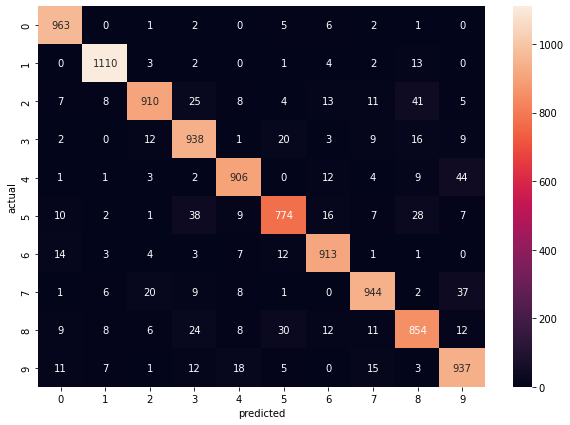

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')

In [ ]:
model= keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), keras.layers.Dense(100,activation='relu'),keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)    #not x_train_flattened

#model will flatten the image of 28*28 pixel

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9239
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9649
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0847 - accuracy: 0.9747
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9877
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [ ]:
  model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.9767


[0.11318287253379822, 0.9767000079154968]